# **Results**

This notebook presents the results of the designed framework for the automatic evaluation of the generated content.

Firstly, we plot the length distribution to investigate if there is any underlying pattern in the way the models generate questions and answer according to the emplloyed prompting technique. Additionally, we complared them with the corresponding distribution of ground-truth questionnaires.

Then, the reached scores and insights are shown for the following metrics:
- Conversion Error and Not-JSON error
- Intraquestionnaire similarity
- Question Type variability
- Semantic similarity
- Serendipity

In [1]:
import json
import os
import sys
sys.path.append('\\'.join(os.getcwd().split('\\')[:-1])+'\\src')

from src.visualization.PairResultVisualizer import PairResultVisualizer
from src.visualization.GlobalResultVisualizer import GlobalResultVisualizer

In [2]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

In [3]:
grv = GlobalResultVisualizer(project_root=PROJECT_ROOT)
bw_conversion_errors_df, bw_json_errors_df, bw_intraquestionnaire_similarity_df, bw_semantic_metrics_df, bw_serendipity_scores_df, bw_qst_type_variability_df = grv.get_best_and_worst_experiments()

## **Length distributions**

In [4]:
config_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "src", "visualization", "experiment_pairs.json")
with open(config_path, "r") as f:
    experiment_confs = json.load(f)
f.close()

pairs = experiment_confs["pairs"]

In [5]:
gpt_4_preds = PairResultVisualizer(pairs[0], project_root=PROJECT_ROOT)
pairs.remove(pairs[0])

pairs_to_remove = []

for pair in pairs:
    if pair["id"].__contains__("GPT-4"):
        gpt_4_preds.add_pair(pair)
        gpt_4_preds.load_data(project_root=PROJECT_ROOT)
        
        pairs_to_remove.append(pair)

for pair in pairs_to_remove:
    pairs.remove(pair)


In [6]:
gpt_35_preds = PairResultVisualizer(pairs[0], project_root=PROJECT_ROOT)
pairs.remove(pairs[0])

for pair in pairs:
    gpt_35_preds.add_pair(pair)
    gpt_35_preds.load_data(project_root=PROJECT_ROOT)

### **Questions**

In [7]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_questions, gpt_35_preds.zero_shot_full_questions, gpt_35_preds.one_shot_full_questions, "NAME", "GPT-3.5-Turbo [Task 1]", "Question")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_questions, gpt_35_preds.zero_shot_questions, gpt_35_preds.one_shot_questions, "NAME", "GPT-3.5-Turbo [Task 2]", "Question")

In [8]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_questions, gpt_4_preds.zero_shot_full_questions, gpt_4_preds.one_shot_full_questions, "NAME", "GPT-4-Turbo [Task 1]", "Question")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_questions, gpt_4_preds.zero_shot_questions, gpt_4_preds.one_shot_questions, "NAME", "GPT-4-Turbo [Task 2]", "Question")

### **Answers**

In [9]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_answers, gpt_35_preds.zero_shot_full_answers, gpt_35_preds.one_shot_full_answers, "ANSWER", "GPT-3.5-Turbo [Task 1]", "Answer")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_answers, gpt_35_preds.zero_shot_answers, gpt_35_preds.one_shot_answers, "ANSWER", "GPT-3.5-Turbo [Task 2]", "Answer")

In [10]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_answers, gpt_4_preds.zero_shot_full_answers, gpt_4_preds.one_shot_full_answers, "ANSWER", "GPT-4-Turbo [Task 1]", "Answer")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_answers, gpt_4_preds.zero_shot_answers, gpt_4_preds.one_shot_answers, "ANSWER", "GPT-4-Turbo [Task 2]", "Answer")

## **Performance metrics**

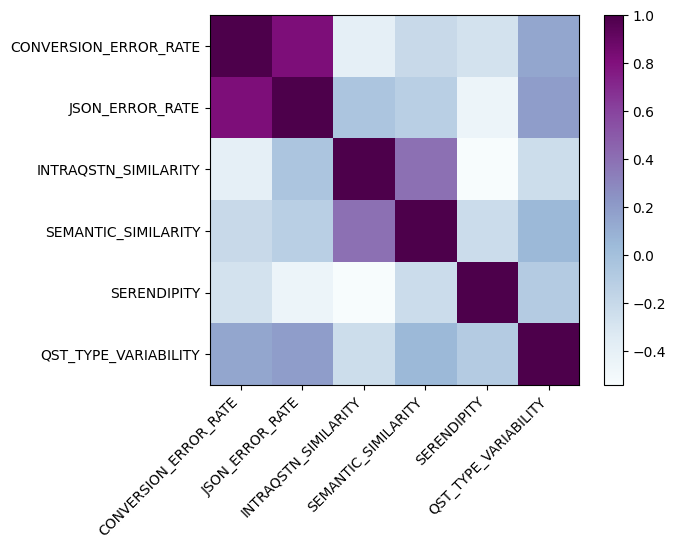

In [11]:
grv.plot_general_correlation_matrix()

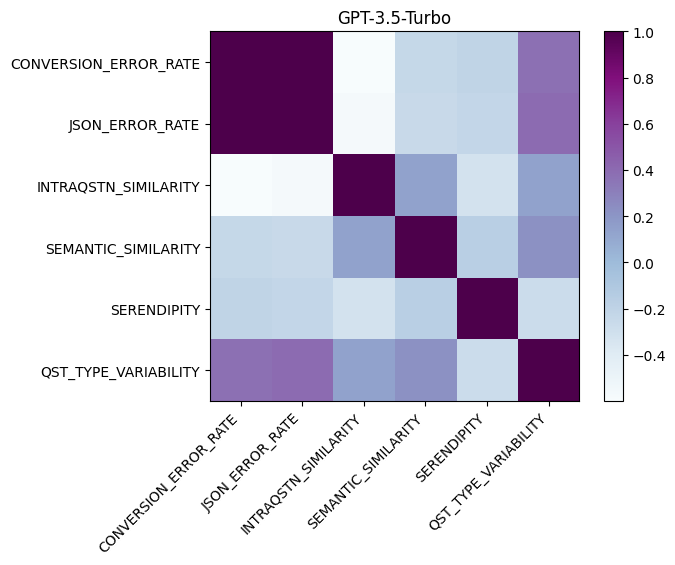

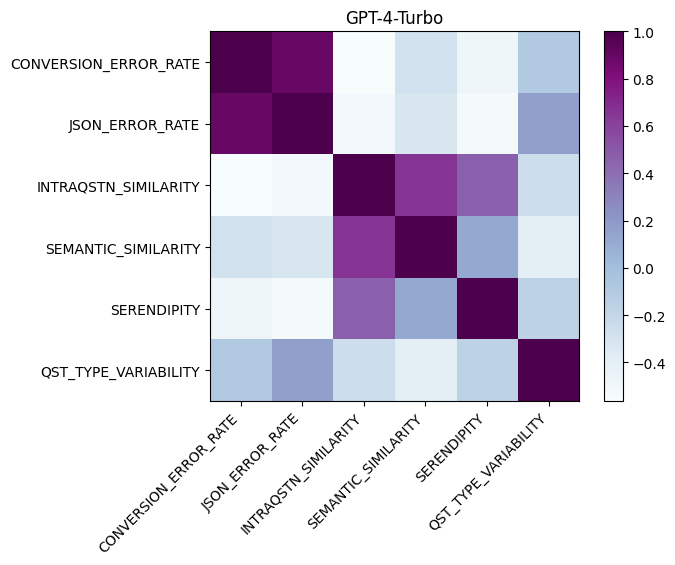

In [12]:
grv.plot_correlation_matrix_by_config(title="GPT-3.5-Turbo", model="gpt-35-turbo")
grv.plot_correlation_matrix_by_config(title="GPT-4-Turbo", model="gpt-4")

### **Conversion and JSON error**

In [13]:
bw_conversion_errors_df[["EXPERIMENT_ID", "CONVERSION_ERROR_RATE"]]

,EXPERIMENT_ID,CONVERSION_ERROR_RATE
0,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_1FP,100.0
1,0s_gpt-35-turbo-dev_6000MT_0T_1FP,100.0
2,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
3,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
4,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
5,0s_FULL_gpt-4-dev_4000MT_0.25T_0FP_JSON,0.0
6,0s_FULL_gpt-4-dev_4000MT_0T_0FP_JSON,0.0
7,0s_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
8,0s_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
9,0s_gpt-35-turbo-dev_6000MT_0T_0FP,0.0


In [14]:
bw_json_errors_df[["EXPERIMENT_ID", "JSON_ERROR_RATE"]]

,EXPERIMENT_ID,JSON_ERROR_RATE
0,0s_gpt-35-turbo-dev_6000MT_0T_1FP,100.0
1,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
2,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
3,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
4,0s_FULL_gpt-4-dev_4000MT_0.25T_0FP_JSON,0.0
5,0s_FULL_gpt-4-dev_4000MT_0T_0FP_JSON,0.0
6,0s_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
7,0s_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
8,0s_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
9,0s_gpt-4-dev_4000MT_0T_0FP_JSON,0.0


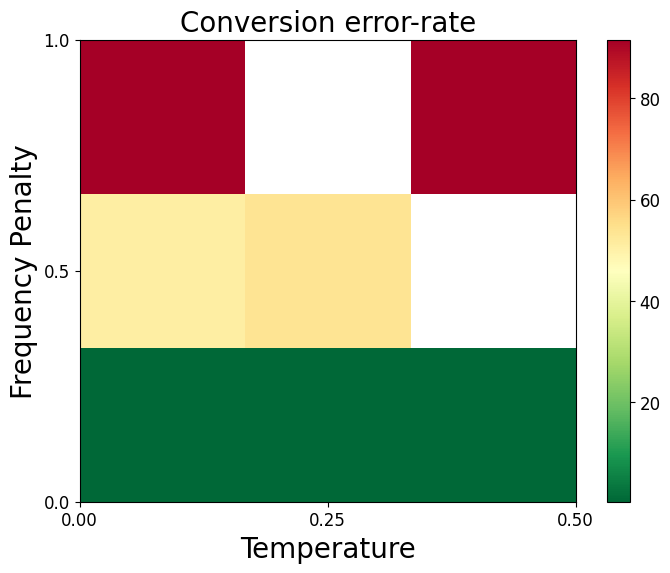

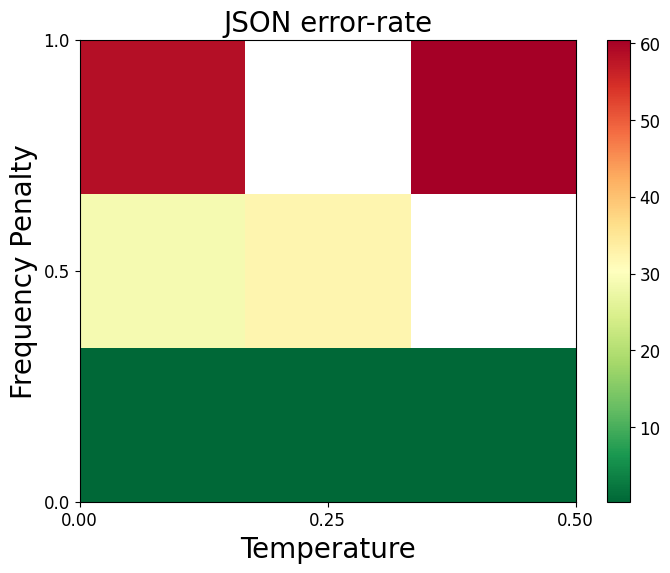

In [15]:
grv.plot_errors_heatmap()

### **Intraquestionnaire similarity**

In [16]:
bw_intraquestionnaire_similarity_df[["EXPERIMENT_ID", "INTRAQSTN_ROUGE_L_F1_SCORE"]]

,EXPERIMENT_ID,INTRAQSTN_ROUGE_L_F1_SCORE
0,0s_FULL_gpt-35-turbo-dev_6000MT_0T_1FP,0.390810
1,0s_gpt-4-dev_4000MT_0.5T_1FP_JSON,0.142613


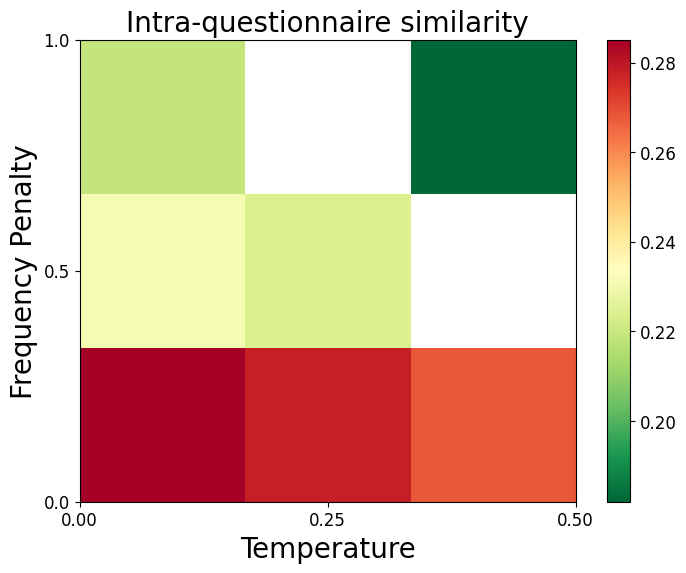

In [17]:
grv.plot_intraquestionnaire_similarity_heatmap()

### **Question type variabiltiy**

In [18]:
bw_qst_type_variability_df[["EXPERIMENT_ID", "AVG_QST_TYPE_VARIABILITY"]]

,EXPERIMENT_ID,AVG_QST_TYPE_VARIABILITY
0,0s_gpt-35-turbo-dev_6000MT_0.5T_1FP,1.000000
1,1s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,0.424084


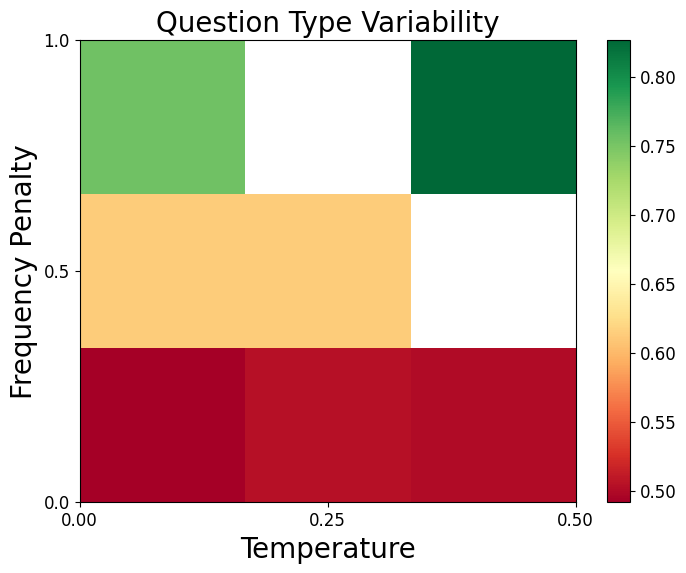

In [19]:
grv.plot_qst_type_variabiliy_heatmap()

### **Semantic similarity**

In [20]:
bw_semantic_metrics_df[["EXPERIMENT_ID", "FINAL_SCORE"]]

,EXPERIMENT_ID,FINAL_SCORE
0,0s_gpt-35-turbo-dev_6000MT_0.5T_1FP,0.650004
1,0s_gpt-35-turbo-dev_6000MT_0T_1FP,0.333347


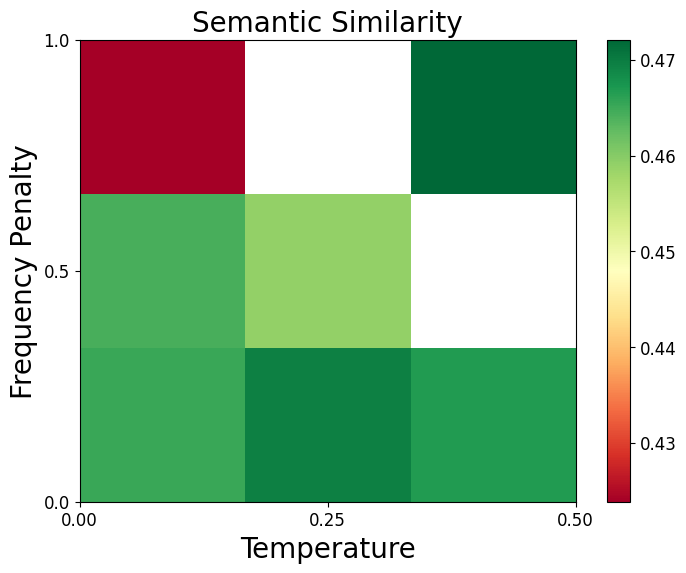

In [21]:
grv.plot_semantic_similarity_heatmap()

### **Serendipity**

In [22]:
bw_serendipity_scores_df[["EXPERIMENT_ID", "AVG_SERENDIPITY_SCORE"]]

,EXPERIMENT_ID,AVG_SERENDIPITY_SCORE
0,0s_gpt-4-dev_4000MT_0T_1FP_JSON,0.872126
1,0s_FULL_gpt-35-turbo-dev_6000MT_0T_1FP,0.666667
2,0s_gpt-35-turbo-dev_6000MT_0.5T_1FP,0.666667


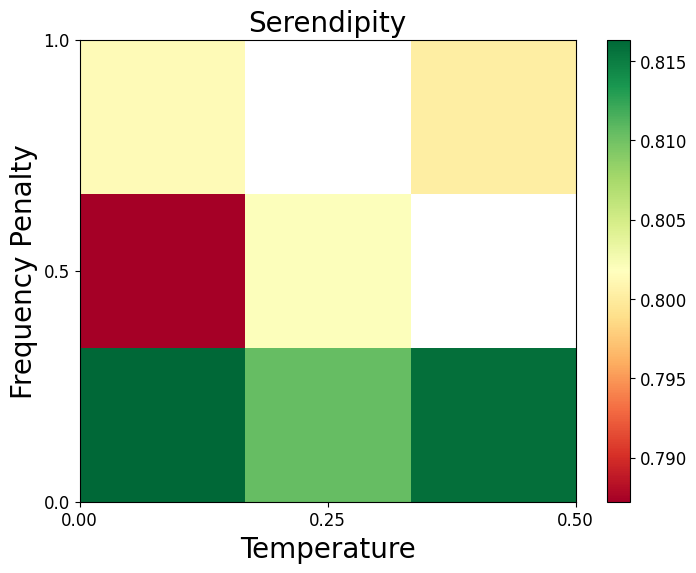

In [23]:
grv.plot_serendipity_heatmap()